# Lab4

# I- Classification

In [6]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

digits = datasets.load_digits()

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state=42, stratify=y)

In [9]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

# 1- k-Nearest Neighbors

# Implement kNN classification for the above dataset

In [11]:
knn = KNeighborsClassifier(n_neighbors=7)

In [12]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [13]:
print(knn.score(X_test, y_test))

0.9833333333333333


In [14]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

## Compute and plot the accuracy scores by k values

In [15]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

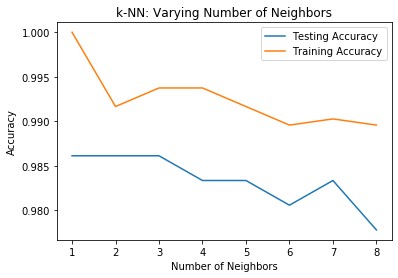

In [16]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# Make conclusions about which k is the best

As we can see from the plot, it appears like the test accuracy is highest when using 3 and 5 neighbors. 7 isn't too bad, but using 8 neighbors or more seems to result in a simple model that under fits the data.

# 2. Support Vector Machine

# Implement SVM classifier for MNIST dataset

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
from sklearn import datasets, svm, metrics

digits = datasets.load_digits()

In [26]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
y_pred = svm.predict(X_test)

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.97      0.92      0.94        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.97      1.00      0.99        36
           5       0.97      1.00      0.99        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.97      0.94      0.96        35
           9       0.95      0.97      0.96        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



# Compute and compare the accuracy scores for at least 3 different kernel

# Polynomial Kernel

In [74]:
from sklearn.svm import SVC
svm = SVC(kernel='poly', degree=8)
svm.fit(X_train, y_train)

/Users/ngothimyphung/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [75]:
y_pred_poly = svm.predict(X_test)

In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_poly))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.97      0.92      0.94        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.97      1.00      0.99        36
           5       0.97      1.00      0.99        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.97      0.94      0.96        35
           9       0.95      0.97      0.96        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



# Gaussian Kernel

In [77]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

/Users/ngothimyphung/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [78]:
y_pred_rbf = svm.predict(X_test)

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       1.00      0.58      0.74        36
           1       1.00      0.61      0.76        36
           2       1.00      0.63      0.77        35
           3       1.00      0.86      0.93        37
           4       1.00      0.56      0.71        36
           5       0.22      1.00      0.37        37
           6       1.00      0.69      0.82        36
           7       1.00      0.50      0.67        36
           8       1.00      0.20      0.33        35
           9       1.00      0.78      0.88        36

    accuracy                           0.64       360
   macro avg       0.92      0.64      0.70       360
weighted avg       0.92      0.64      0.70       360



# Sigmoid Kernel

In [80]:
from sklearn.svm import SVC
svm = SVC(kernel='sigmoid')
svm.fit(X_train, y_train)

/Users/ngothimyphung/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [81]:
y_pred_sigmoid = svm.predict(X_test)

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_sigmoid))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.33      0.06      0.10        36
           2       0.00      0.00      0.00        35
           3       0.10      1.00      0.19        37
           4       0.00      0.00      0.00        36
           5       0.00      0.00      0.00        37
           6       0.00      0.00      0.00        36
           7       0.00      0.00      0.00        36
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00        36

    accuracy                           0.11       360
   macro avg       0.04      0.11      0.03       360
weighted avg       0.04      0.11      0.03       360



/Users/ngothimyphung/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Compare 

If we compare the performance of the different types of kernels we can clearly see that the sigmoid kernel performs the worst. This is due to the reason that sigmoid function returns two values, 0 and 1, therefore it is more suitable for binary classification problems. However, in our case we had three output classes.

Amongst the Gaussian kernel and polynomial kernel, we can see that Gaussian kernel achieved a perfect 100% prediction rate while polynomial kernel misclassified one instance. Therefore the Gaussian kernel performed slightly better. However, there is no hard and fast rule as to which kernel performs best in every scenario. It is all about testing all the kernels and selecting the one with the best results on your test dataset.

# Conclusion about which kernal should be used in this case 

I think we should used the Polynomial Kernel in this case

# 3. Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [83]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

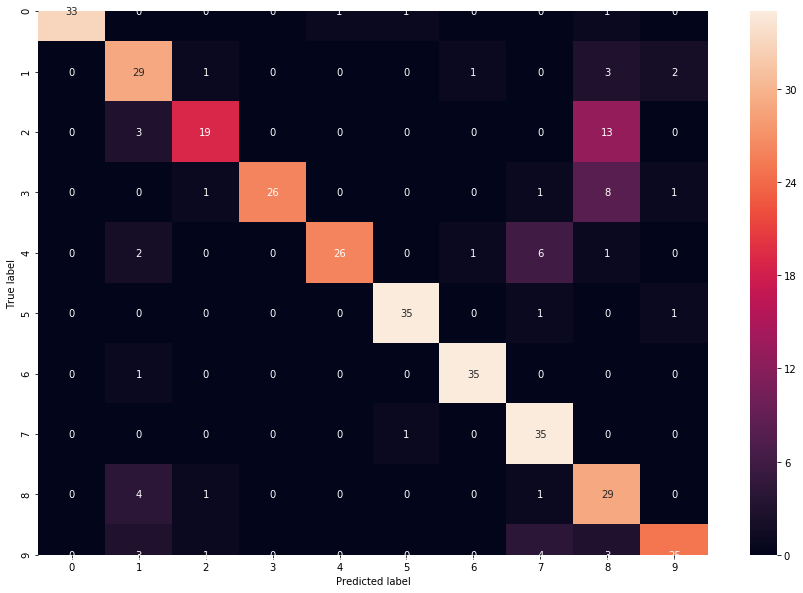

In [84]:
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Text(0, 0.5, 'Accuracy')

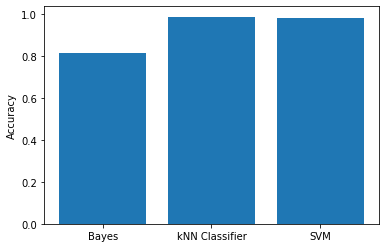

In [86]:
from sklearn.metrics import accuracy_score

bayes_acc = accuracy_score(y_test, y_pred)
knn_acc = max(test_accuracy)
svm_acc = accuracy_score(y_test, y_pred_poly)

plt.bar(['Bayes', 'kNN Classifier', 'SVM'],[bayes_acc, knn_acc, svm_acc])
plt.ylabel('Accuracy')

# II. Regression

# 1. Linear Regression

# Use seaborn to visualize the data of Gapminder like following image

In [9]:
import pandas as pd
import seaborn as sns

In [7]:
df = pd.read_csv('gapminder.csv')

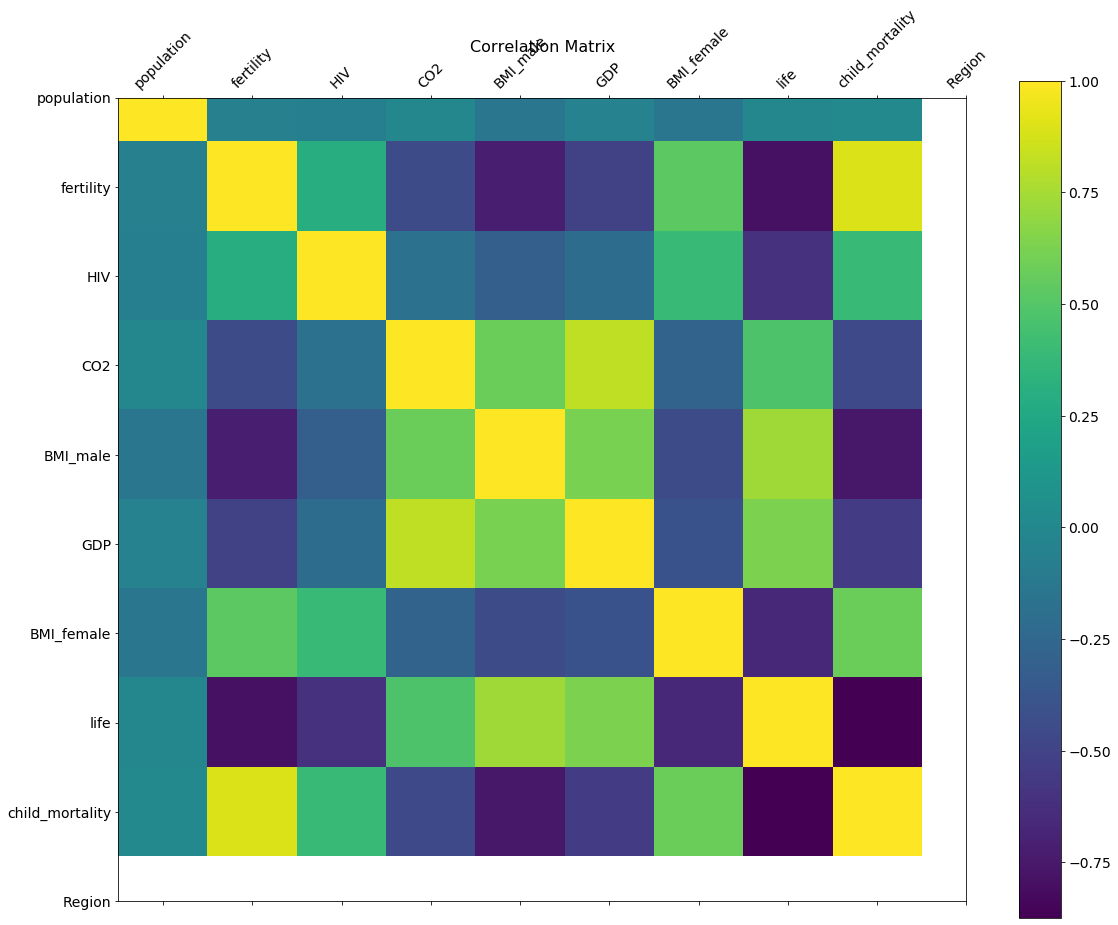

In [29]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

# Apply linear regression with the 'fertulity' feature to predict life expectancy

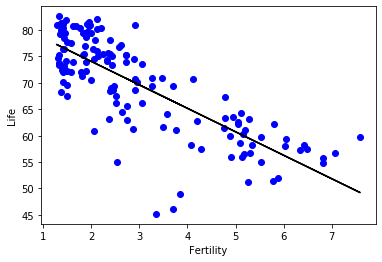

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
x = df['fertility'].values.reshape(-1,1)
y = df['life'].values.reshape(-1,1)
lr.fit(x,y)
y_pred = lr.predict(x)

plt.scatter(x,y,color = 'blue')
plt.plot(x,y_pred,color='black')
plt.xlabel('Fertility')
plt.ylabel('Life')
plt.show()


# all features

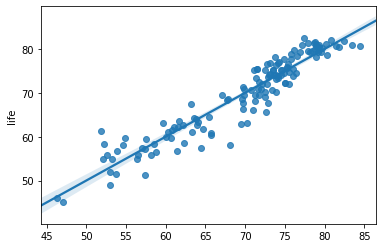

In [54]:
af = list(df.columns)
af = af[:-1]
af.pop(7)
x_a = df[af]
lr.fit(x_a,y)
y_pred_a = lr.predict(x_a)
y_a = df['life']
sns.regplot(y_pred_a,y_a)

# compare 

* Fertility

In [50]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x,y)

/Users/ngothimyphung/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.75397745, 0.55557583, 0.57886144])

* All features

In [55]:
cross_val_score(lr,x_a,y_a)

/Users/ngothimyphung/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.83699524, 0.87875694, 0.89986165])